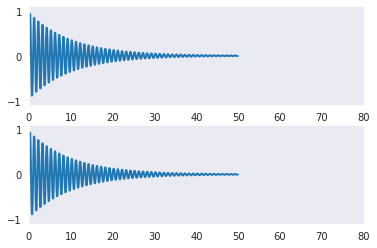

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def data_gen():
    for cnt in range(500):
        t = cnt / 10
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)

def init():
    del xdata[:]
    del ydata[:]
    for i in range(2):
        ax[i].set_ylim(-1.1, 1.1)
        ax[i].set_xlim(0, 10)
        # line.append(ax[i].plot([],[],lw=2))
    return line

def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    for i in range(2):
        xmin, xmax = ax[i].get_xlim()
        if t >= xmax:
            ax[i].set_xlim(xmin, 2*xmax)
            ax[i].figure.canvas.draw()
        line[i].set_data(xdata, ydata)
    return line

fig, ax = plt.subplots(2,1)
line=[] # 存储plot()返回的lines对象，需要作为全局变量，
for i in range(2):
    line.extend(ax[i].plot([], [], lw=2))
    ax[i].grid()
xdata, ydata = [], []
# 由于传入的frames参数是一个generator，save()不能探知到要存储的帧数，所以只默认保存100帧，通过save_count参数来指定正确的保存帧数。
ani = animation.FuncAnimation(fig, run, data_gen, blit=False, interval=10,repeat=False, init_func=init,save_count=500)
ani.save("dubwave.gif", writer='pillow')
plt.show()